In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install numpy
!pip install matplotlib
!pip install pandas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def binary_cost(predictions, labels):
    # true(no cancer, cancer) vs observed(non cancer, cancer)
    cost_matrix = np.array([[0, 100],
                           [0, 0]])
    cost_dict = {}

    for index in range(11):
      threshold = cost_matrix[0][1]/(cost_matrix[0][1]+cost_matrix[1][0])
      cost = 0
      for index in range(len(predictions)):
          if predictions[index] > threshold:
             cost += (cost_matrix[labels[index]][1])
          else:
             cost += (cost_matrix[labels[index]][0])
      cost_dict[threshold] = cost/len(predictions)
      cost_matrix[0, 1] -= 10
      cost_matrix[1, 0] += 10
    return cost_dict



In [5]:
predictions = np.array([0.9])
labels = np.array([0])
print("false positive: " + str(binary_cost(predictions, labels)))

predictions = np.array([0.1])
labels = np.array([1])
print("false negative: " + str(binary_cost(predictions, labels)))

false positive: {1.0: 0.0, 0.9: 0.0, 0.8: 80.0, 0.7: 70.0, 0.6: 60.0, 0.5: 50.0, 0.4: 40.0, 0.3: 30.0, 0.2: 20.0, 0.1: 10.0, 0.0: 0.0}
false negative: {1.0: 0.0, 0.9: 10.0, 0.8: 20.0, 0.7: 30.0, 0.6: 40.0, 0.5: 50.0, 0.4: 60.0, 0.3: 70.0, 0.2: 80.0, 0.1: 90.0, 0.0: 0.0}


In [6]:
def evaluate_cost(filename):
    csv_file = pd.read_csv(filename)
    labels = csv_file["label"].to_numpy()
    predictions = csv_file["prediction"].to_numpy()
    total_cost_dict = binary_cost(predictions, labels)
    return total_cost_dict

In [7]:
filenames = {"ISIC CNN No Calibration":                         "/content/drive/MyDrive/Outputs/isic_cnn_ISIC_none.csv",
                   "ISIC CNN Temperature Scaling":                    "/content/drive/MyDrive/Outputs/isic_cnn_ISIC_temperature_False.csv",
                   "ISIC CNN Temperature Scaling at Boundry":         "/content/drive/MyDrive/Outputs/isic_cnn_ISIC_temperature_True.csv"
                   }

In [8]:
dict_list = []
for file, path in filenames.items():
    dict_list.append(evaluate_cost(path))


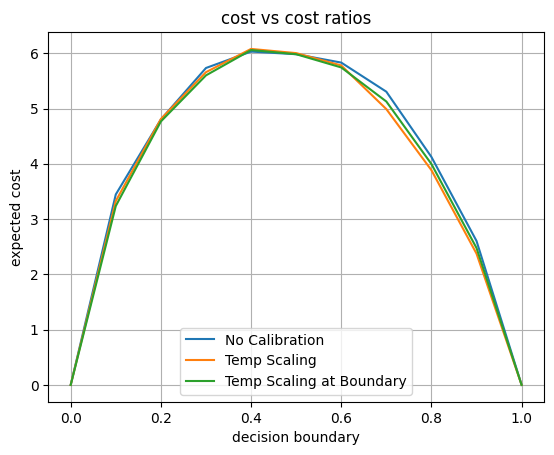

In [9]:
for cost_dict, label in zip(dict_list, ["No Calibration", "Temp Scaling", "Temp Scaling at Boundary"]):
    x_values = list(cost_dict.keys())
    y_values = list(cost_dict.values())
    plt.plot(x_values, y_values, label=label)
plt.xlabel("decision boundary")
plt.ylabel("expected cost")
plt.title("cost vs cost ratios")
plt.legend()
plt.grid(True)
plt.show()


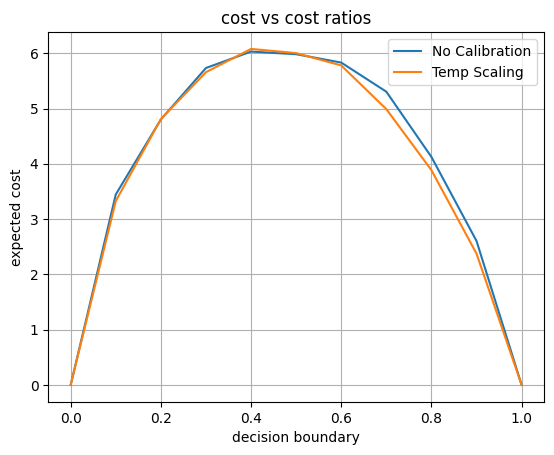

In [10]:
for cost_dict, label in zip([dict_list[0],dict_list[1]], ["No Calibration", "Temp Scaling"]):
    x_values = list(cost_dict.keys())
    y_values = list(cost_dict.values())
    plt.plot(x_values, y_values, label=label)
plt.xlabel("decision boundary")
plt.ylabel("expected cost")
plt.title("cost vs cost ratios")
plt.legend()
plt.grid(True)
plt.show()

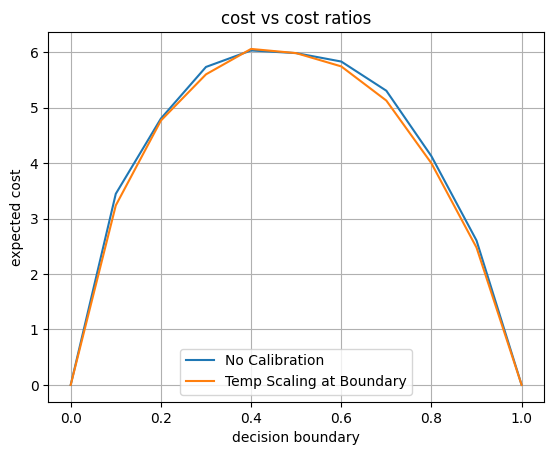

In [11]:
for cost_dict, label in zip([dict_list[0],dict_list[2]], ["No Calibration", "Temp Scaling at Boundary"]):
    x_values = list(cost_dict.keys())
    y_values = list(cost_dict.values())
    plt.plot(x_values, y_values, label=label)
plt.xlabel("decision boundary")
plt.ylabel("expected cost")
plt.title("cost vs cost ratios")
plt.legend()
plt.grid(True)
plt.show()

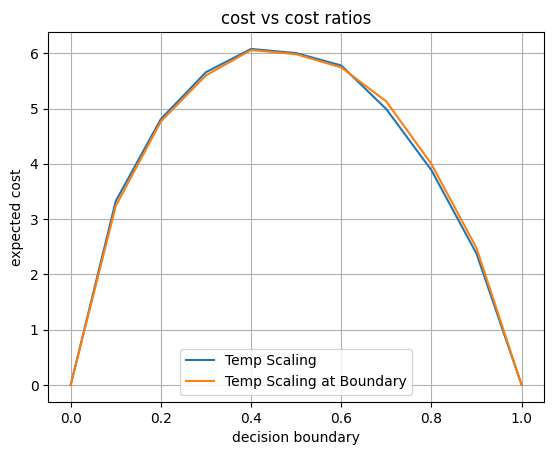

In [12]:
for cost_dict, label in zip([dict_list[1],dict_list[2]], ["Temp Scaling", "Temp Scaling at Boundary"]):
    x_values = list(cost_dict.keys())
    y_values = list(cost_dict.values())
    plt.plot(x_values, y_values, label=label)
plt.xlabel("decision boundary")
plt.ylabel("expected cost")
plt.title("cost vs cost ratios")
plt.legend()
plt.grid(True)
plt.show()